### Data Reading & Writing

In [6]:
import pandas as pd
# Reading CSV
try:
    df = pd.read_excel('e:/360DigitMG/Data_Science/Notes/Logistic regresssion/logistic regresssion/claims_test.xlsx')
except FileNotFoundError:
    print("File not found")
except pd.errors.EmptyDataError:
    print("No data")
except Exception as e:
    print("Error:", e)


In [51]:
#READ DATA WITH SPECIFIC ROWS AND COLUMNS
df = pd.read_excel('e:/360DigitMG/Data_Science/Notes/Logistic regresssion/logistic regresssion/claims_test.xlsx',nrows=15,usecols=['CLMSEX','CASENUM','LOSS'])

In [ ]:

#Top 5 rows
print(df.head(5))
print(df.loc[6:10, ['CLMSEX', 'CASENUM', 'LOSS']])
print(df.iloc[6:11])

   CASENUM  CLMSEX    LOSS
0        5       0  34.940
1        3       1   0.891
2       51       1   0.884
3       55       0   1.350
4       61       1   6.190
    CLMSEX  CASENUM   LOSS
6        0    17487  0.915
7        0    17507  1.685
8        1    17550  3.030
9        0    17560  0.309
10       0    17599  1.717
   CASENUM  CLMSEX   LOSS
6    17487       0  0.915
7    17507       0  1.685
8    17550       1  3.030
9    17560       0  0.309


In [13]:
#summary statistics
summary=df.describe()

In [21]:
#writing to csv
summary.to_csv('output.csv', index=True)

#writing to excel
with pd.ExcelWriter('output.xlsx') as writer:
    summary.to_excel(writer, sheet_name='Summary', index=True)

### Data Inspection

In [32]:
#PREVIEW DATA
print("Data Preview:\n\n")
print(df.head())
print(df.tail(4))

#get info
print("\nData Info:\n\n")
print(df.info())
print("\nData Columns:\n\n")
print(df.columns)       
print("\nData Shape:\n\n")
print(df.shape)
print("\nData Types:\n\n")
print(df.dtypes)
print("\nMissing Values:\n\n")
print(df.isnull().sum())
print("\nSummary Statistics:\n\n")
print(df.describe(include='all'))   


Data Preview:


   CASENUM  CLMSEX  CLMINSUR  SEATBELT  CLMAGE    LOSS
0        5       0         1         0    50.0  34.940
1        3       1         0         0    18.0   0.891
2       51       1         1         0    60.0   0.884
3       55       0         1         1     NaN   1.350
4       61       1         1         0    37.0   6.190
    CASENUM  CLMSEX  CLMINSUR  SEATBELT  CLMAGE   LOSS
25    18460       0         1         0    50.0  3.786
26    34104       1         1         0    16.0  0.060
27    34100       0         1         0     NaN  0.576
28    34110       1         1         0    46.0  4.705

Data Info:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   29 non-null     int64  
 1   CLMSEX    29 non-null     int64  
 2   CLMINSUR  29 non-null     int64  
 3   SEATBELT  29 non-null     int64  
 4   CLMAGE    27 non-null   

### Duplicate Data

In [34]:
#check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates removed.")    
    


Number of duplicate rows: 0


In [38]:
pd.core.series.Series

pandas.core.series.Series

In [37]:
type(df.duplicated())

pandas.core.series.Series

### Missing Data

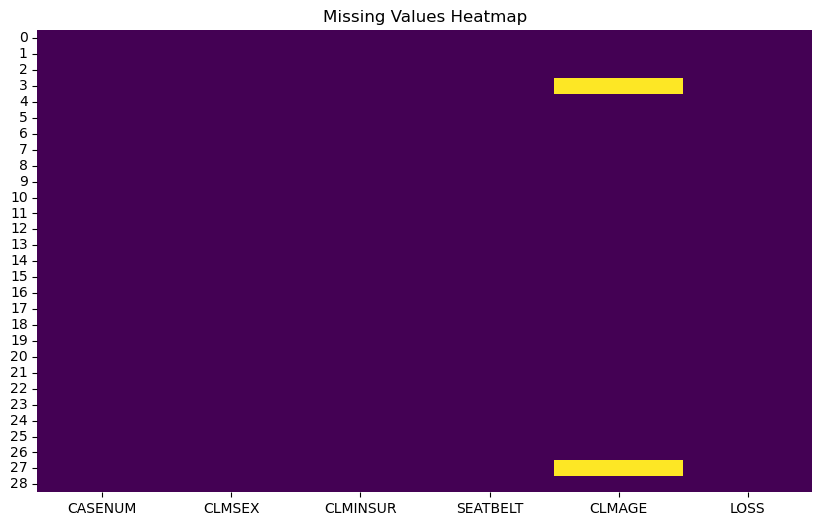

In [41]:
# Check for missing values
df.isna().sum() # Count missing values per column
df.isnull().any() # Check if any column has missing values
# Missing value percentage
(df.isnull().sum() / df.shape[0]) * 100
# Visualize missing data
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [47]:
df.notna().sum() # Count non-missing values per column

CASENUM     29
CLMSEX      29
CLMINSUR    29
SEATBELT    29
CLMAGE      27
LOSS        29
dtype: int64

###  loc and iloc

In [59]:
import pandas as pd

data = {
    "Name": ["Alice", "Bob", "Charlie", "David"],
    "Age": [25, 30, 35, 40],
    "City": ["NY", "LA", "SF", "CHI"]
}

df = pd.DataFrame(data, index=["a", "b", "c", "d"])
print(df)


      Name  Age City
a    Alice   25   NY
b      Bob   30   LA
c  Charlie   35   SF
d    David   40  CHI


In [60]:
# Select a single row by label
df.loc["b"]


Name    Bob
Age      30
City     LA
Name: b, dtype: object

In [61]:
# Select multiple rows by label
df.loc[["a", "c"]]


,Name,Age,City
a,Alice,25,NY
c,Charlie,35,SF


In [62]:
# Slice by labels (inclusive of end!)
df.loc["a":"c"]   # Returns a, b, c


,Name,Age,City
a,Alice,25,NY
b,Bob,30,LA
c,Charlie,35,SF


In [63]:
# Conditional filtering with loc
df.loc[df["Age"] > 30]


,Name,Age,City
c,Charlie,35,SF
d,David,40,CHI


In [64]:
# Select a single row by integer position
df.iloc[1]   # Second row (Bob)


Name    Bob
Age      30
City     LA
Name: b, dtype: object

In [65]:
# Select multiple rows
df.iloc[[0, 2]]


,Name,Age,City
a,Alice,25,NY
c,Charlie,35,SF


In [68]:
# Select by row & column position
df.iloc[1, 1]   # Row 1, Col 1 → 30


30

In [71]:
# Slice by positions (end excluded!)
df.iloc[0:2]   # Returns rows 0 and 1 → a, b


,Name,Age,City
a,Alice,25,NY
b,Bob,30,LA


In [74]:
# Negative indexing works
df.iloc[-1]   # Last row (David)


Name    David
Age        40
City      CHI
Name: d, dtype: object

| Feature        | `.loc[]`                         | `.iloc[]`                      |
| -------------- | -------------------------------- | ------------------------------ |
| Indexing type  | Label-based (row/column names)   | Integer position (0,1,2…)      |
| End in slicing | **Inclusive** of end label       | **Exclusive** of end index     |
| Conditions     | ✅ Yes (`df.loc[df["Age"] > 30]`) | ❌ No                           |
| Negative index | ❌ No (will error)                | ✅ Yes (works like Python list) |
| Usage example  | `df.loc["b", "Age"]`             | `df.iloc[1, 1]`                |


📌 4. Analogy

Think of:

.loc[] like saying: “Give me the row with label ‘b’”

.iloc[] like saying: “Give me the row at position 1”

”

👉 Quick check for you:
If I want to get Charlie’s city using both .loc and .iloc, how would you write those two commands?

In [76]:
df.head()

,Name,Age,City
a,Alice,25,NY
b,Bob,30,LA
c,Charlie,35,SF
d,David,40,CHI


In [79]:
#If I want to get Charlie’s city using both .loc and .iloc, how would you write those two commands?
#using loc
print(df.loc["c", "City"])
#using loc with conditionn as name
print(df.loc[df["Name"] == "Charlie", "City"])

#using iloc
print(df.iloc[2, 2])


SF
c    SF
Name: City, dtype: object
SF


Let’s compare .loc with condition vs. .query() in pandas. Both are used for filtering, but they work a bit differently.

### 📌 1. Using .loc with condition

In [83]:
df.loc[df["Name"] == "Charlie", "City"]


c    SF
Name: City, dtype: object

✅ Works with boolean masks (df["Name"] == "Charlie").

✅ You can use multiple conditions with & (AND), | (OR), and ~ (NOT).

⚠️ But you must repeat df["col"] every time.

### 📌 2. Using .query()

In [88]:
df.query("Name == 'Charlie'")["City"]


c    SF
Name: City, dtype: object

✅ Query strings let you write conditions more like SQL.

✅ Cleaner syntax, no need to repeat df["col"].

✅ Supports logical operators (and, or, not OR & | ~).

⚠️ But you write conditions as strings (so no Python variables directly, unless you use @var).

| Feature          | `.loc` with condition            | `.query()`                      |
| ---------------- | -------------------------------- | ------------------------------- |
| Syntax style     | Python-like (`df["Age"] > 30`)   | SQL-like (`Age > 30`)           |
| Column reference | Must use `df["col"]`             | Just write `col`                |
| Variable usage   | Direct (`df["Age"] > my_var`)    | Need `@my_var`                  |
| Performance      | Slightly faster in most cases    | Sometimes optimized but similar |
| Readability      | Verbose with multiple conditions | Clean and short                 |


### Data Inspectiom


In [98]:
#top 5 rows
print("Top 5 rows:")
print(df.head())
#DF info
print("DF info:")
print(df.info())
# Data Types
print("Data Types:")            
print(df.dtypes)
# retrieving only integer columns
print("Integer Columns:")
print(df.select_dtypes(include='int64'))


Top 5 rows:
      Name  Age City
a    Alice   25   NY
b      Bob   30   LA
c  Charlie   35   SF
d    David   40  CHI
DF info:
<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, a to d
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    4 non-null      object
 1   Age     4 non-null      int64 
 2   City    4 non-null      object
dtypes: int64(1), object(2)
memory usage: 300.0+ bytes
None
Data Types:
Name    object
Age      int64
City    object
dtype: object
Integer Columns:
   Age
a   25
b   30
c   35
d   40


In [104]:
# size of the dataframe
print("Size of the DataFrame:")
print(df.size) #returns total number of elements
#shape of the dataframe
print("Shape of the DataFrame:")
print(df.shape) #rows, columns
#columns of the dataframe
print("Columns of the DataFrame:")
print(df.columns)# return index type of columns
#index of the dataframe
print("Index of the DataFrame:")    
print(df.index) # returns index object

Size of the DataFrame:
12
Shape of the DataFrame:
(4, 3)
Columns of the DataFrame:
Index(['Name', 'Age', 'City'], dtype='object')
Index of the DataFrame:
Index(['a', 'b', 'c', 'd'], dtype='object')


In [114]:
# statistical summary
print("Statistical Summary:")
print(df.describe(include='all'))
print("---"*10)
# quantity of unique values in each column
print("Unique Values per Column:")
print(df.nunique())
print("---"*10)

# quantiles
print("Quantiles:") 
print(df.quantile([0.25, 0.5, 0.75]))
print("---"*10)


Statistical Summary:
         Name        Age City
count       4   4.000000    4
unique      4        NaN    4
top     Alice        NaN   NY
freq        1        NaN    1
mean      NaN  32.500000  NaN
std       NaN   6.454972  NaN
min       NaN  25.000000  NaN
25%       NaN  28.750000  NaN
50%       NaN  32.500000  NaN
75%       NaN  36.250000  NaN
max       NaN  40.000000  NaN
------------------------------
Unique Values per Column:
Name    4
Age     4
City    4
dtype: int64
------------------------------
Quantiles:
        Age
0.25  28.75
0.50  32.50
0.75  36.25
------------------------------


C:\Users\MK PERUMALLA\AppData\Local\Temp\ipykernel_28688\4202777089.py:12: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.quantile([0.25, 0.5, 0.75]))


### Missing Data


In [120]:
#check for missing data
print("Missing Values per Column:") 
print(df.isnull().sum())

# check if any column has missing values
print("Any Missing Values in Columns:") 
print(df.isnull().any())

# missing value percentage
print("Missing Value Percentage per Column:")
print(df.isnull().mean() * 100)

Missing Values per Column:
Name    0
Age     0
City    0
dtype: int64
Any Missing Values in Columns:
Name    False
Age     False
City    False
dtype: bool
Missing Value Percentage per Column:
Name    0.0
Age     0.0
City    0.0
dtype: float64


### Data Manipulation

In [129]:
# boolean filtering
print("Boolean Filtering (Age > 30):")
print(df[df['Age'] > 30])

# multiple conditions
print("Multiple Conditions (Age > 30 and City == 'SF'):")
print(df[(df['Age'] > 30) & (df['City'] == 'SF')])

## isin filtering
print("ISIN Filtering (City in ['SF', 'NY']):")
print(df[df['City'].isin(['SF', 'NY'])])

Boolean Filtering (Age > 30):
      Name  Age City
c  Charlie   35   SF
d    David   40  CHI
Multiple Conditions (Age > 30 and City == 'SF'):
      Name  Age City
c  Charlie   35   SF
ISIN Filtering (City in ['SF', 'NY']):
      Name  Age City
a    Alice   25   NY
c  Charlie   35   SF


In [135]:
# apply function
print("Apply Function (Age + 5):")
print(df['Age'].apply(lambda x: x + 5))

#replace categorical values
print("Replace Categorical Values (NY -> New York):")
print(df['City'].replace({'NY': 'New York', 'LA': 'Los Angeles', 'SF': 'San Francisco', 'CHI': 'Chicago'}))

Apply Function (Age + 5):
a    30
b    35
c    40
d    45
Name: Age, dtype: int64
Replace Categorical Values (NY -> New York):
a         New York
b      Los Angeles
c    San Francisco
d          Chicago
Name: City, dtype: object


In [ ]:
## pivot table
print("Pivot Table (Average Age by City):")
pivot=df.pivot_table(values='Age', index='City', aggfunc='mean',margins=True)
print(pivot)    

##unpivot
print("Unpivot (Melt) DataFrame:")
unpivoted = pd.melt(df, id_vars=['City'], value_vars=['Age'], var_name='Variable', value_name='Value')
print(unpivoted)

Pivot Table (Average Age by City):
       Age
City      
CHI   40.0
LA    30.0
NY    25.0
SF    35.0
All   32.5
Unpivot (Melt) DataFrame:
  City variable  value
0   NY      Age     25
1   LA      Age     30
2   SF      Age     35
3  CHI      Age     40


In [146]:
# rolling mean
print("Rolling Mean (Window=2) of Age:")
print(df['Age'].rolling(window=2).mean())
#expanding window
print("Expanding Window Mean of Age:")  
print(df['Age'].expanding().mean())


Rolling Mean (Window=2) of Age:
a     NaN
b    27.5
c    32.5
d    37.5
Name: Age, dtype: float64
Expanding Window Mean of Age:
a    25.0
b    27.5
c    30.0
d    32.5
Name: Age, dtype: float64


In [153]:
# shifting values
df["prev_value"] = df["Age"].shift(2)
df["next_value"]=df['Age'].shift(-2)

In [154]:
df

,Name,Age,City,prev_value,next_value
a,Alice,25,NY,NaN,35.0
b,Bob,30,LA,NaN,40.0
c,Charlie,35,SF,25.0,NaN
d,David,40,CHI,30.0,NaN
